<a href="https://colab.research.google.com/github/ElizaOG11/EDA-Analisis-exploratorio-Taller-1/blob/main/An%C3%A1lisis_final_calidad_corrientes_pop.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INTRODUCCIÓN**

Se eligió una base de datos de calidad de agua de ocho corrientes del Municipio de Popayán, manejada por la Corporación Autónoma Regional del Cauca (CRC), la cual tiene datos de diferentes parámetros de calidad del agua medidos en distintas estaciones de monitoreo en tres épocas del año para periodos entre 2010 y 2024, en varias de ellas.

La información ahí contenida es importante para analizar el estado de cada corriente hídrica en cuanto a calidad, oferta y estado de la corriente y en este sentido, priorizar las intervenciones en cada una de las fuentes las cuales estarán oreintadas hacia el mantenimiento de la oferta y la recuperación de su calidad tanto para el consumo humano (dependiendo de la fuente) como para el equilibrio ecológico permitiendo que la población en general, continúe con la provisión de los servicios ecosistémicos.

Para efectos del presente trabajo, fue necesario realizar una preparación exhaustiva del dataset teniendo en cuenta que la base de datos no está organizada, tiene muchos valores perdidos y todo los valores eran tipo *object* a excepción de uno tipo *int*. También se realizó el filtro para trabajar solamente con el Río Cauca como base de análisis puesto que es una de las fuentes principales a nivel local, regional y nacional, y que en este convergen las principales corrientes hídricas monitoreadas. Finalmente, se filtró el dataset para acotar los parámetros a DBO, DQO y SST como indicadores de calidad del agua para generalizar y facilitar el análisis teniendo en cuenta su relevancia y representatividad.

# ***Diccionario de datos***

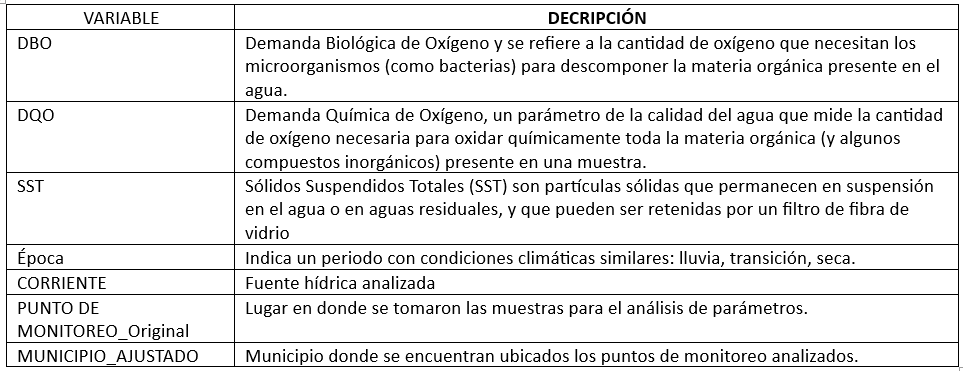




# **PREPARACIÓN DE LOS DATOS**

Se importan las librerías, se observa la generalidad del dataset y de acuerdo con eso, se eliminan las columnas innecesarias, estandarización  de nombres de los valores en las variables y se procede a realizar la visualización de los datos.

In [5]:
#Importar las librerías

import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
import statsmodels.formula.api as smf
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
#Leer el dataframe y conocer la base de datos
df = pd.read_csv('/content/calidad_corrientes_transf_pop')
df.head()

,Ano,Epoca,CORRIENTE,PUNTO DE MONITOREO_Original,MUNICIPIO_AJUSTADO,ALCALINIDAD,COLOR UPC,CONDUCTIVIDAD,DBO,DQO,DUREZA,NITRATOS,NITRITOS,OXIGENO DISUELTO,PH,SST,TEMPERATURA,TURBIEDAD
0,2010,Seca,Rio Cauca,Estacion Julumito,Popayan,0.95,38.0,237.0,1.2,4.0,53.5,2.53,0.09,8.01,5.98,58.3,17.2,9.0
1,2010,Seca,Rio Cauca,Puente vivero CRC,Popayan,0.95,75.0,190.6,0.5,4.0,34.0,0.80,0.02,13.00,5.81,35.0,16.6,1.3
2,2010,Transicion,Rio Cauca,Estacion Julumito,Popayan,0.95,49.0,100.0,2.9,10.0,21.4,2.14,0.18,5.96,6.53,115.0,16.1,33.2
3,2010,Transicion,Rio Cauca,Puente vivero CRC,Popayan,0.95,57.0,128.0,0.5,23.0,21.4,1.72,0.14,6.29,6.43,156.0,15.2,27.8
4,2011,Lluvias,Rio Cauca,Estacion Julumito,Popayan,0.95,20.0,116.2,1.6,10.0,48.4,0.90,0.10,4.50,7.30,128.0,18.5,8.4


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78 entries, 0 to 77
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Ano                          78 non-null     int64  
 1   Epoca                        78 non-null     object 
 2   CORRIENTE                    78 non-null     object 
 3   PUNTO DE MONITOREO_Original  78 non-null     object 
 4   MUNICIPIO_AJUSTADO           78 non-null     object 
 5   ALCALINIDAD                  78 non-null     float64
 6   COLOR UPC                    78 non-null     float64
 7   CONDUCTIVIDAD                78 non-null     float64
 8   DBO                          78 non-null     float64
 9   DQO                          78 non-null     float64
 10  DUREZA                       78 non-null     float64
 11  NITRATOS                     78 non-null     float64
 12  NITRITOS                     78 non-null     float64
 13  OXIGENO DISUELTO      

Se observa que el data set no tiene datos nulos y que tiene datos tipo float, enteros y object debido a que, para el análisis univariado y bivariado se realizó una preparación exhaustiva de los datos transformando datos tipo object a float, haciendo pivot de columnas, estandarizando los nombres de los puntos de monitoreo, eliminando columnas innecesarias, entre otros.

# **Selección de variables objetivo: Demanda Bioquímica de Oxígeno (DBO), Demanda Química de Oxígeno (DQO) y Sólidos Suspendidos Totales (SST)**

# **Justificación**

La **Demanda Bioquímica de Oxígeno (DBO5)** es un parámetro que mide la cantidad de oxígeno disuelto que los microorganismos aeróbicos consumen para descomponer la materia orgánica presente en una muestra de agua, durante un período de cinco días a una temperatura controlada de 20 °C. Es un indicador clave para evaluar el nivel de contaminación orgánica de corrientes hídricas. Una DBO5 elevada sugiere una alta presencia de materia orgánica biodegradable, lo que puede indicar contaminación y un posible impacto negativo en la vida acuática.

Por su parte, la **Demanda Química de Oxígeno (DQO)** mide la cantidad de oxígeno necesaria para oxidar químicamente la materia orgánica (y algunos compuestos inorgánicos) presentes en el agua, utilizando un agente oxidante fuerte. A diferencia de la DBO5, que solo tiene en cuenta la materia biodegradable, la DQO evalúa toda la materia orgánica, proporcionando una visión más completa de la carga contaminante.

La relación de estos dos parámetros **(DBO/DQO)** permite medir si la materia contenida en el agua es biodegradable o no. La relación entre DBO5 y DQO es un indicador útil para entender la biodegradabilidad del agua. Una relación DBO5/DQO elevada sugiere una mayor presencia de materia orgánica fácilmente biodegradable, mientras que una relación baja puede indicar la presencia de compuestos tóxicos o difíciles de degradar.

*Fuente: https://www.eurofins-environment.es/es/dbo5-dqo-analisis-aguas/*

Finalmente, se seleccionó el parámetro **Sólidos Suspendidos Totales (SST)**. Estos se refieren a pequeñas partículas sólidas que permanecen en suspensión en el agua. Esta selección se realizó porque los SST son una causa extremadamente importante del deterioro de la calidad del agua que conduce a problemas estéticos, mayores costos de tratamiento del agua, una disminución de los recursos pesqueros y una grave degradación ecológica de los entornos acuáticos (*Bilotta G.S & Brazier R.F, 2008: Understanding the influence of suspended solids on water quality and aquatic biota*). Este es el parámetro más frecuentemente asociado con el deterioro de la calidad del agua causado por los sólidos. Los SST comprenden tanto materia inorgánica como orgánica.

Así las cosas, estos tres parámetros logran medir materia orgánica e inorgánica disuelta en el agua en forma de sólidos y líquidos, logrando dar una visión "generalizada" de la calidad del agua y su estado para la biota y la capacidad de ofertar servicios ecosistémicos.



Filtro de variables a trabajar:

In [8]:
# Eliminar del dataset las columnas 'ALCALINIDAD', 'COLOR UPC', 'CONDUCTIVIDAD','DUREZA', 'NITRATOS', 'NITRITOS', 'OXIGENO DISUELTO','PH', 'TEMPERATURA','TURBIEDAD'
df = df.drop(['ALCALINIDAD', 'COLOR UPC', 'CONDUCTIVIDAD','DUREZA', 'NITRATOS', 'NITRITOS', 'OXIGENO DISUELTO','PH', 'TEMPERATURA','TURBIEDAD'], axis=1)

In [9]:
#Análisis descriptivo general del dataset
print('Tabla 2. Análisis descriptivo del dataset')
df.describe()

Tabla 2. Análisis descriptivo del dataset


,Ano,DBO,DQO,SST
count,78.000000,78.000000,78.000000,78.000000
mean,2016.769231,4.828718,16.891667,68.072436
std,4.130731,4.611020,11.735943,57.411590
min,2010.000000,0.500000,4.000000,10.000000
25%,2013.250000,0.800000,10.000000,32.112500
50%,2017.000000,2.350000,15.000000,51.750000
75%,2020.750000,10.000000,15.825000,87.750000
max,2024.000000,20.800000,70.000000,369.000000


A través de la tabla resumen puede observarse que los valores min y max sugieren la existencia de outliers o valores pico para todas las variables. La media está afectada por los valores extremos, especialmente de la variable DQO y SST. La desviación estándar para los SST es mucho mayor que en las otras dos variables.

# **Visualización de los datos**

Se generan histogramas para tener una idea de las frecuencias en cada variable.

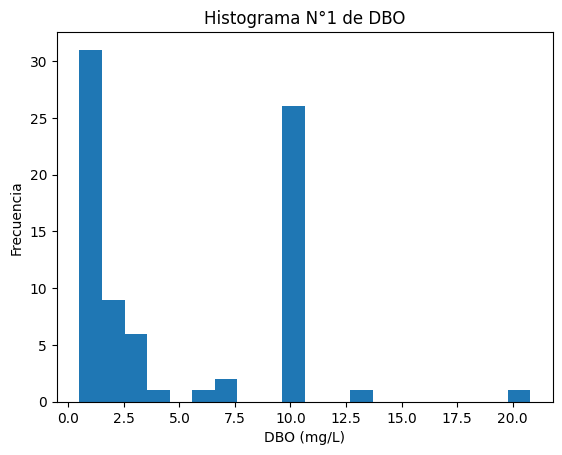

In [10]:
# Histograma de DBO
plt.hist(df['DBO'], bins=20)
plt.xlabel('DBO (mg/L)')
plt.ylabel('Frecuencia')
plt.title('Histograma N°1 de DBO')
plt.show()


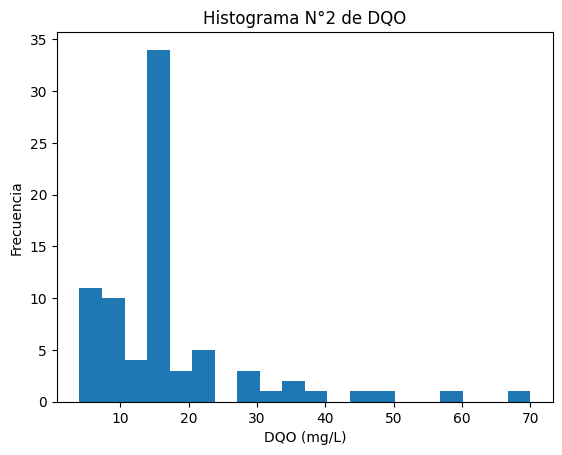

In [11]:
# Histograma de DQO
plt.hist(df['DQO'], bins=20)
plt.xlabel('DQO (mg/L)')
plt.ylabel('Frecuencia')
plt.title('Histograma N°2 de DQO')
plt.show()

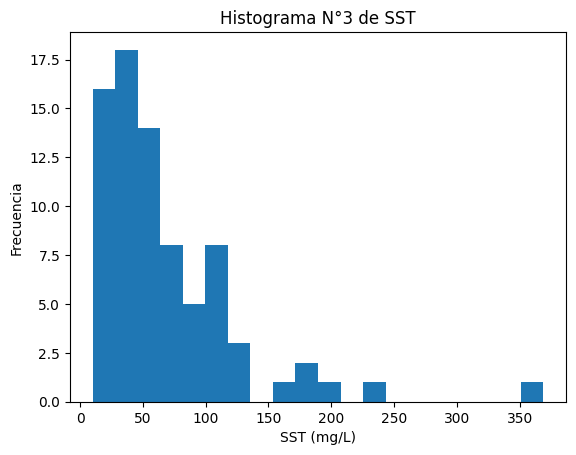

In [12]:
# Histograma por época para SST

# Histograma de SST
plt.hist(df['SST'], bins=20)
plt.xlabel('SST (mg/L)')
plt.ylabel('Frecuencia')
plt.title('Histograma N°3 de SST')
plt.show()

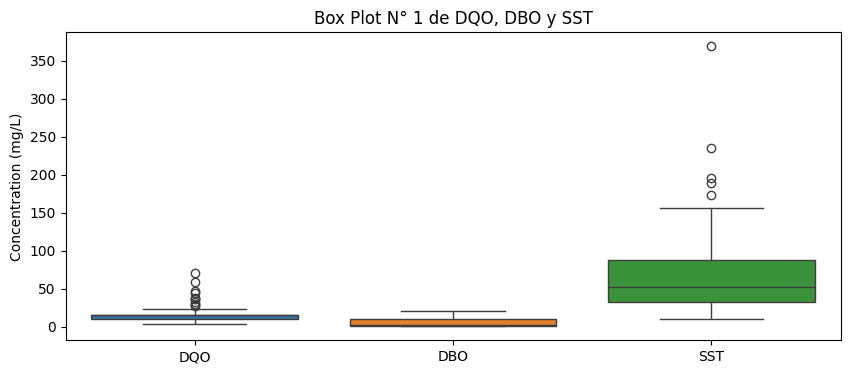

In [13]:
# Diagrama tipo box plot para DQO, DBO y SST

plt.figure(figsize=(10, 4))
sns.boxplot(data=df[['DQO', 'DBO', 'SST']])
plt.ylabel('Concentration (mg/L)')
plt.title('Box Plot N° 1 de DQO, DBO y SST')
plt.show()

Puede observarse a partir de los box plot anteriores que en la variable DBO no se tienen outliers, caso contrario a la DQO y los SST, en donde hay valores atípicos por encima de los límites superioes, 22 mg/L y 150 mg/L respectivamente. La mayor concentración de los datos para DQO se encuentra en el rango entre 10 y 16 mg/L. En cuanto a los SST la mayor concentración de los datos se encuentra entre 60 y 100 mg/L. Para la DBO los datos se concentran mayormente entre 2 y 10 mg/L. Por su parte, la DQO tiene concentrados los datos entre 10 y 15 mg/L. La mediana para la DQO oscila entre 12 y 14 mg/L, para la DBO, entre 2 y 5 mg/L y para los SST entre 50 y 55 mg/L.

***Visualización de datos por época***

*Visualización de DQO por época:*

Histogramas N°4, 5, 6 de DQO por época


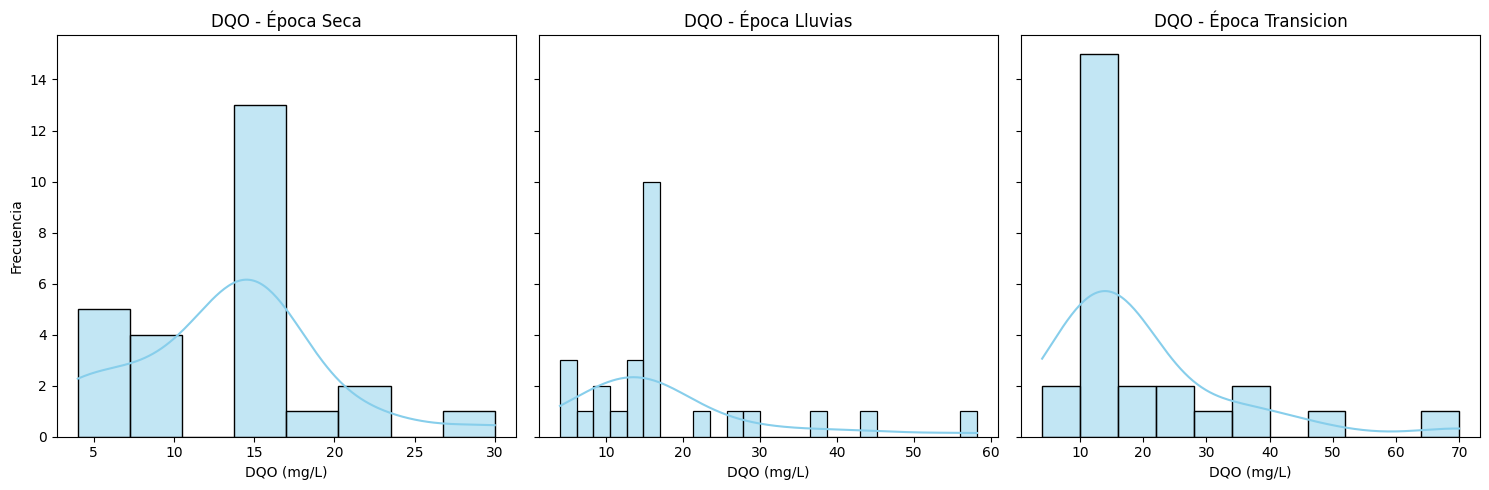

In [14]:
# Histograma de DQO

# Definir las épocas
epocas = ["Seca", "Lluvias", "Transicion"]

# Crear figura con 3 subplots (uno por época)
fig, axes = plt.subplots(1, 3, figsize=(15,5), sharey=True)

for i, epoca in enumerate(epocas):
    sns.histplot(
        data=df[df["Epoca"] == epoca],
        x="DQO",
        kde=True,
        color="skyblue",
        ax=axes[i]
    )
    axes[i].set_title(f"DQO - Época {epoca.capitalize()}")
    axes[i].set_xlabel("DQO (mg/L)")
    axes[i].set_ylabel("Frecuencia")

print("Histogramas N°4, 5, 6 de DQO por época")
plt.tight_layout()
plt.show()

/tmp/ipython-input-916096904.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Epoca", y="DQO", data=df, palette="Set2", medianprops={'color': 'red'})


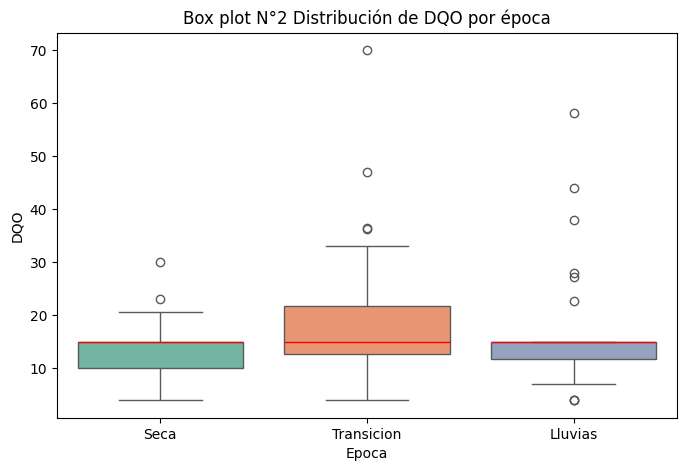

In [15]:
# 1. Boxplot de DQO por época

plt.figure(figsize=(8,5))
sns.boxplot(x="Epoca", y="DQO", data=df, palette="Set2", medianprops={'color': 'red'})
plt.title("Box plot N°2 Distribución de DQO por época")
plt.show()

De acuerdo con los resultados anteriores, se observa que la época con mayor valor pico de DQO es la de transición, sin embargo, la época de lluvias tiene mayor número de valores atípicos. En época seca la DQO maneja valores menores a 30 mg/L.

*Visualización de DBO por época:*

Histogramas N°7, 8 y 9 DBO - Época


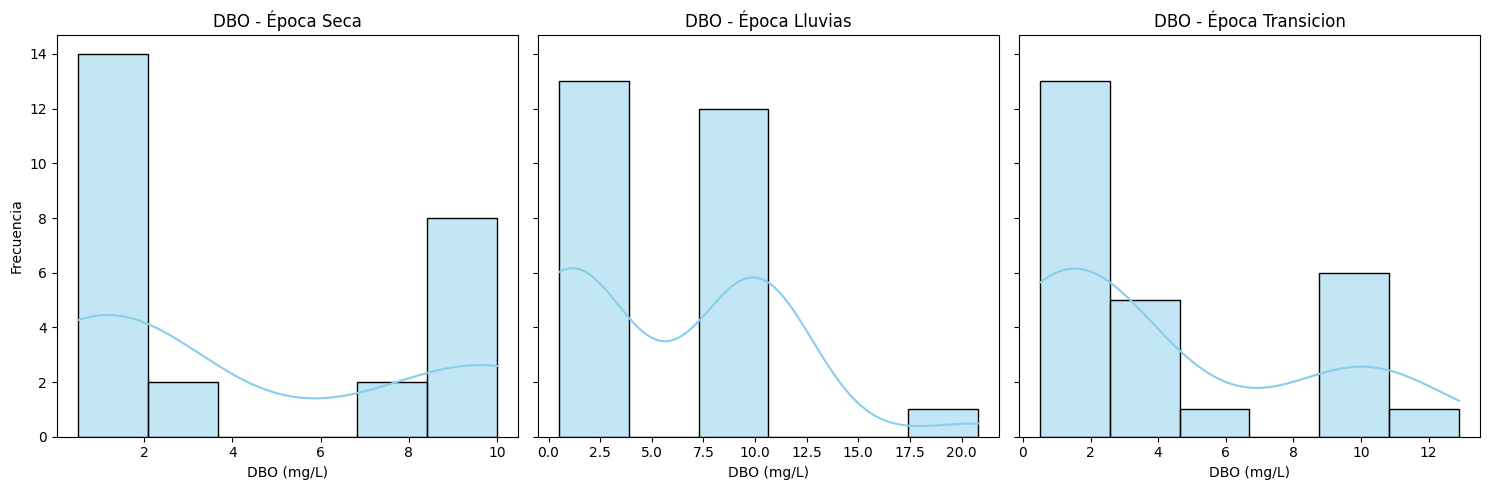

In [16]:
# Histograma de DBO

epocas = ["Seca", "Lluvias", "Transicion"]
fig, axes = plt.subplots(1, 3, figsize=(15,5), sharey=True)

for i, epoca in enumerate(epocas):
    sns.histplot(
        data=df[df["Epoca"] == epoca],
        x="DBO",
        kde=True,
        color="skyblue",
        ax=axes[i]
    )
    axes[i].set_title(f"DBO - Época {epoca.capitalize()}")
    axes[i].set_xlabel("DBO (mg/L)")
    axes[i].set_ylabel("Frecuencia")

print('Histogramas N°7, 8 y 9 DBO - Época')
plt.tight_layout()
plt.show()

/tmp/ipython-input-2504669545.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Epoca", y="DBO", data=df, palette="Set3", medianprops={'color': 'red'})


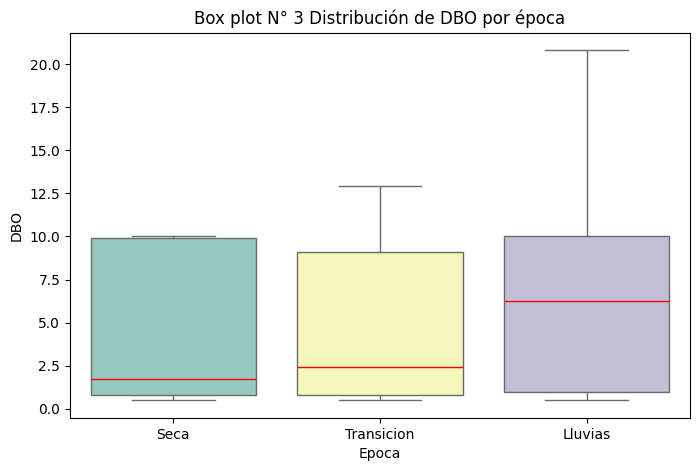

In [17]:
# Boxplot de DBO por época

plt.figure(figsize=(8,5))
sns.boxplot(x="Epoca", y="DBO", data=df, palette="Set3", medianprops={'color': 'red'})
plt.title("Box plot N° 3 Distribución de DBO por época")
plt.show()

Se observa de acuerdo a las visualizaciones anteriores que la DBO no presenta valores atípicos significativos. En general, la concentración de DBO es estable. Los valores mas altos de esta variable se observan en ápoca de lluvias.

*Visualización de SST por época:*

Histogramas N° 10, 11 y 12 SST - Época


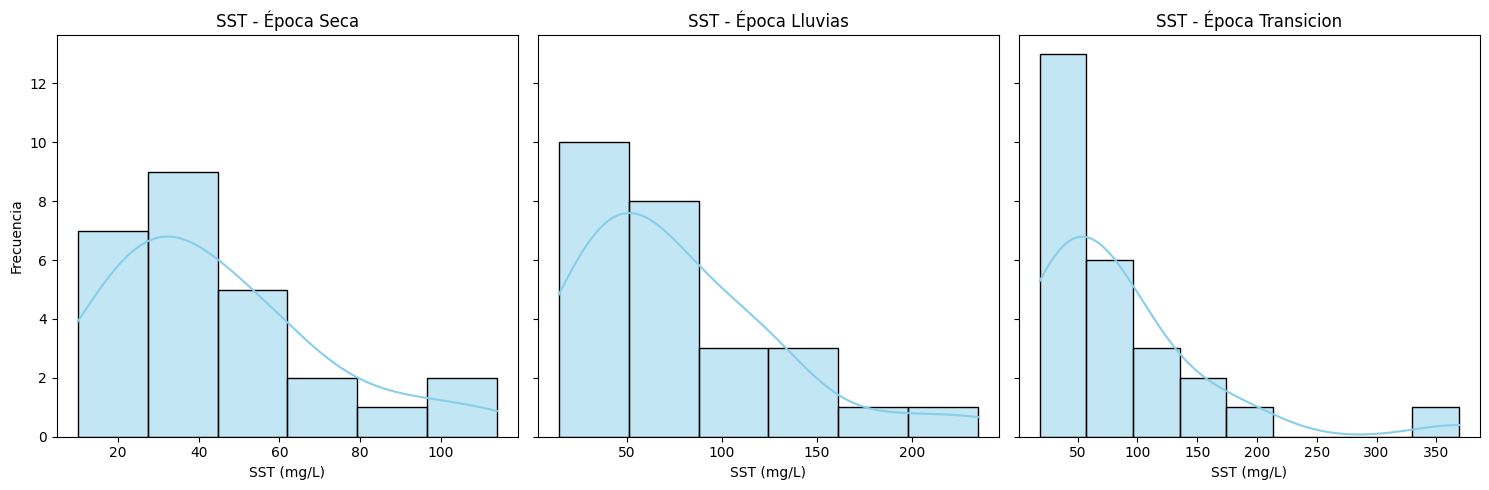

In [18]:
epocas = ["Seca", "Lluvias", "Transicion"]
fig, axes = plt.subplots(1, 3, figsize=(15,5), sharey=True)

for i, epoca in enumerate(epocas):
    sns.histplot(
        data=df[df["Epoca"] == epoca],
        x="SST",
        kde=True,
        color="skyblue",
        ax=axes[i]
    )
    axes[i].set_title(f"SST - Época {epoca.capitalize()}")
    axes[i].set_xlabel("SST (mg/L)")
    axes[i].set_ylabel("Frecuencia")

print('Histogramas N° 10, 11 y 12 SST - Época')
plt.tight_layout()
plt.show()

/tmp/ipython-input-3965976165.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Epoca", y="SST", data=df, palette="Set1", medianprops={'color': 'red'})


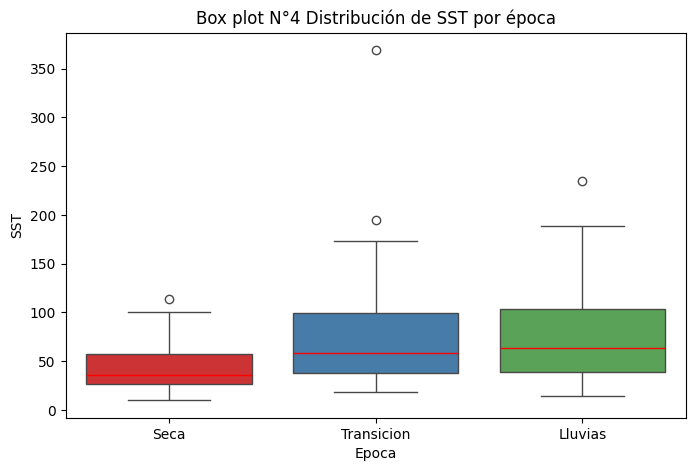

In [19]:
# Boxplot de SST por época
plt.figure(figsize=(8,5))
sns.boxplot(x="Epoca", y="SST", data=df, palette="Set1", medianprops={'color': 'red'})
plt.title("Box plot N°4 Distribución de SST por época")
plt.show()

De acuerdo con lo anterior, los valores mas altos de concentración para SST se observan en la época de transición. Existen pocos outliers en cada una de las épocas. La época seca tiene los valores mas pequeños de concentración.

*Correlación entre las variables*

In [20]:
#Matriz de correlación entre variables

print('Tabla N°3 de correlación')

df[['DBO', 'DQO', 'SST']].corr()

Tabla N°3 de correlación


,DBO,DQO,SST
DBO,1.000000,0.278357,0.307546
DQO,0.278357,1.000000,0.255839
SST,0.307546,0.255839,1.000000


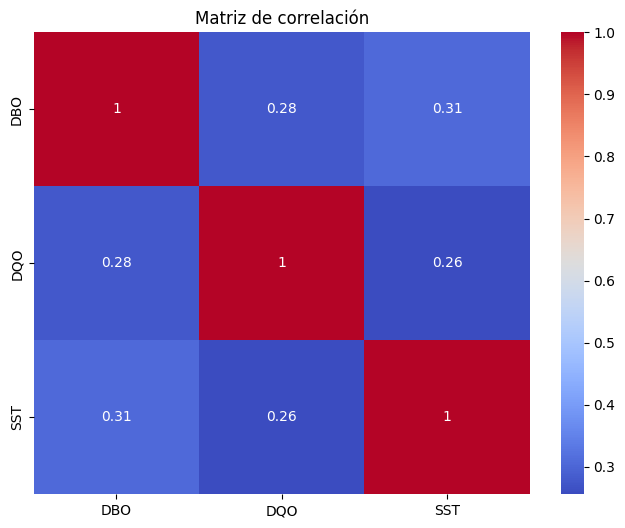

In [21]:
# Gráfica de matriz de correlación (calor)

plt.figure(figsize=(8, 6))
sns.heatmap(df[['DBO', 'DQO', 'SST']].corr(), annot=True, cmap='coolwarm')
plt.title('Matriz de correlación')
plt.show()

In [22]:
corr = df["DQO"].corr(df["DBO"])
print("Correlación Pearson:", corr)

Correlación Pearson: 0.2783568499559853


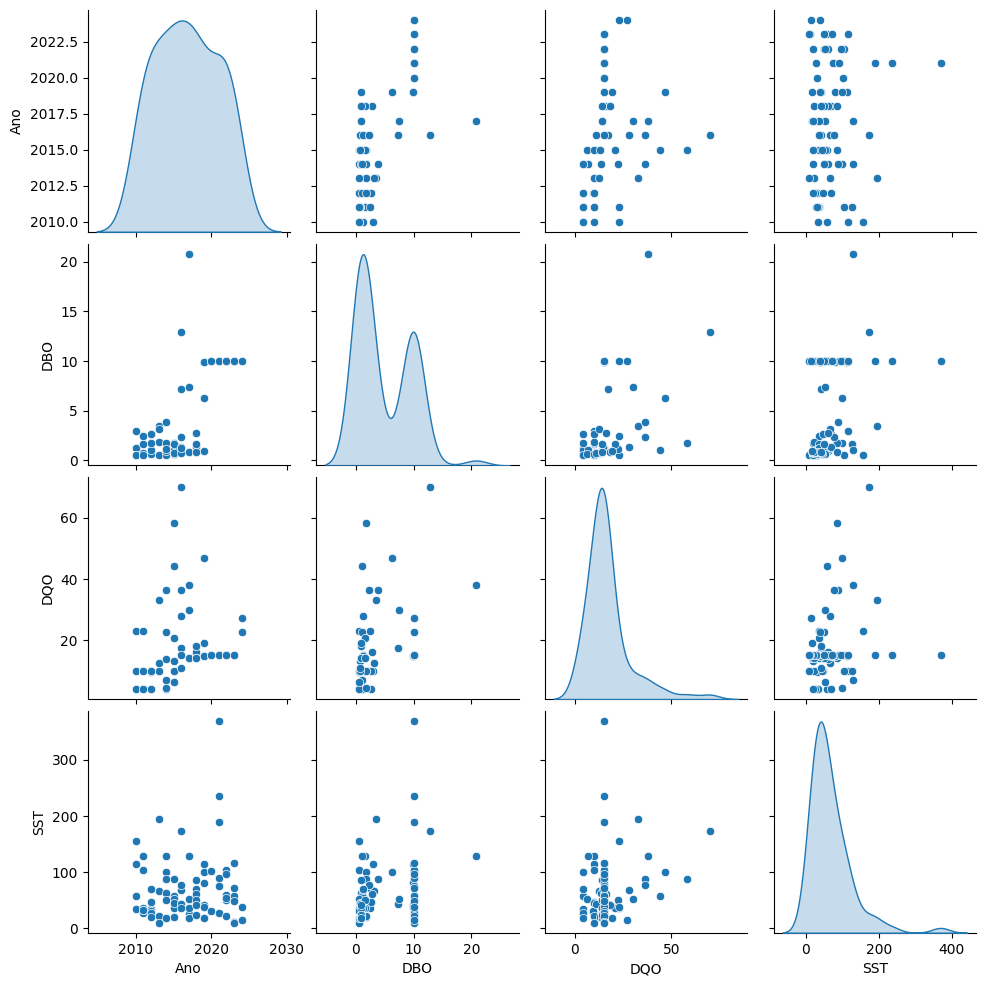

In [23]:
# Matriz de dispersión entre variables

sns.pairplot(df, diag_kind='kde')

Como puede observarse en la matriz y gráficos de correlación, no hay relación fuerte entre las variables. Cada variable es independiente de la otra.

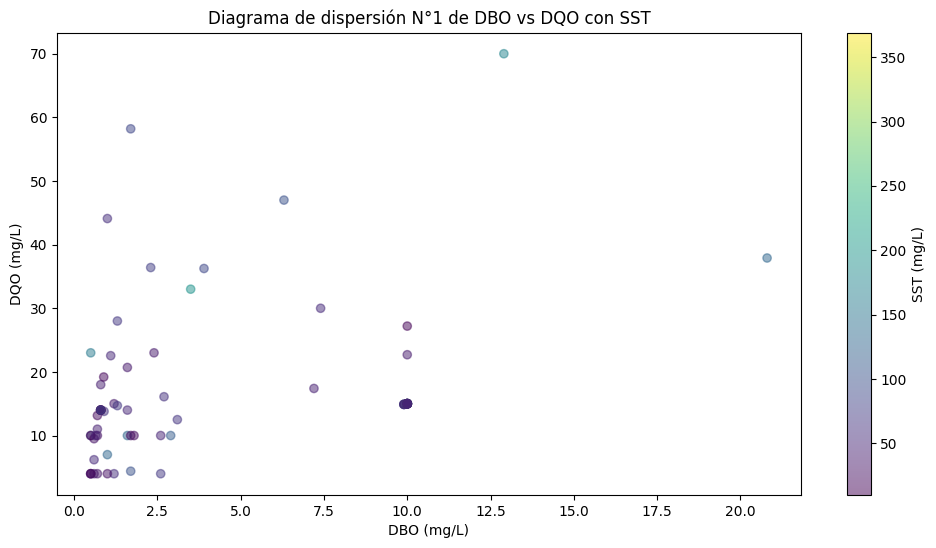

In [24]:
# Diagrama de dispersión para DBO, DQO y SST

plt.figure(figsize=(12, 6))
scatter = plt.scatter(df['DBO'], df['DQO'], c=df['SST'], cmap='viridis', alpha=0.5)
plt.xlabel('DBO (mg/L)')
plt.ylabel('DQO (mg/L)')
plt.title('Diagrama de dispersión N°1 de DBO vs DQO con SST')
plt.colorbar(scatter, label='SST (mg/L)')
plt.show()

El gráfico anterior permite deducir que no se observa una tendencia o relación lineal clara entre las dos variables. Cada variable es independiente.

In [25]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [26]:
# Probando varios grados de polinomio:
X = df[["DBO"]]   # predictor
y = df[["DQO", "SST"]]     # variable dependiente

# Crear polinomio grado 4
poly = PolynomialFeatures(degree=4)
X_poly = poly.fit_transform(X)

# Ajustar modelo
modelo = LinearRegression()
modelo.fit(X_poly, y)

# Predicciones
y_pred = modelo.predict(X_poly)

# Evaluación
print("R²:", r2_score(y, y_pred))

for grado in range(1,5):  # prueba de 1 a 4
    poly = PolynomialFeatures(degree=grado)
    X_poly = poly.fit_transform(X)
    modelo = LinearRegression().fit(X_poly, y)
    y_pred = modelo.predict(X_poly)
    print(f"Grado {grado} → R²: {r2_score(y, y_pred):.3f}")

R²: 0.20941230257897175
Grado 1 → R²: 0.086
Grado 2 → R²: 0.090
Grado 3 → R²: 0.117
Grado 4 → R²: 0.209


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


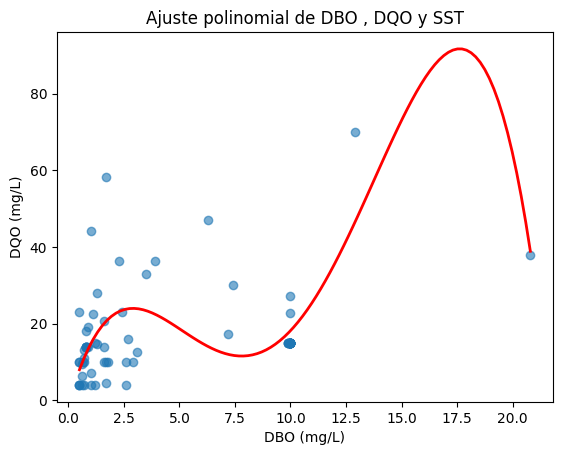

In [27]:
# DIBUJAR LA CURVA POLINOMIO GRADO 4;
X_nuevo = np.linspace(X.min(), X.max(), 100).reshape(-1,1)
X_nuevo_poly = poly.transform(X_nuevo)
y_nuevo = modelo.predict(X_nuevo_poly)

plt.scatter(X, y.iloc[:, 0], alpha=0.6)
plt.plot(X_nuevo, y_nuevo[:, 0], color="red", linewidth=2)
plt.xlabel("DBO (mg/L)")
plt.ylabel("DQO (mg/L)")
plt.title("Ajuste polinomial de DBO , DQO y SST")
plt.show()

Lo anterior no muestra tampoco una relación o tendencia de la curva, que permita relacionar claramente las variables entre sí puesto que es un R2 muy pequeño aun.

# **Definición de valores críticos**

La normativa colombiana define los valores límites permisibles de algunos parámetros de calidad para las aguas residuales de acuerdo con la Resolución 631 de 2015.


*   Sólidos Suspendidos Totales (SST) es de **70 mg/L.**
*   Demanda Química de Oxígeno (DQO) es de **150 mg/L**
*   Demanda Bioquímica de Oxígeno (DBO5) es de **70 mg/L**

Teniendo en cuenta que, dentro de los valores de DQO y DBO no hay datos que superen el valor máximo permisible, se toma como valores críticos aquellos que estén en el percentil 90 o 95 de cada variable.

Adionalmente, se toma como crítico aquel valor que, de acuerdo con el promedio histórico, supere significativamente la media, para efectos de este ejercicio, se tomaría + 2 desviaciones estándar.


In [28]:
#Cálculo de los valores máximos para DBO y DQO

p90_dqo = df['DQO'].quantile(0.90)
p95_dqo = df['DQO'].quantile(0.95)

p90_dbo = df['DBO'].quantile(0.90)
p95_dbo = df['DBO'].quantile(0.95)

print("DQO - P90:", p90_dqo, " P95:", p95_dqo)
print("DBO - P90:", p90_dbo, " P95:", p95_dbo)

DQO - P90: 30.89999999999999  P95: 38.82999999999995
DBO - P90: 10.0  P95: 10.0


# **Análisis temporal**

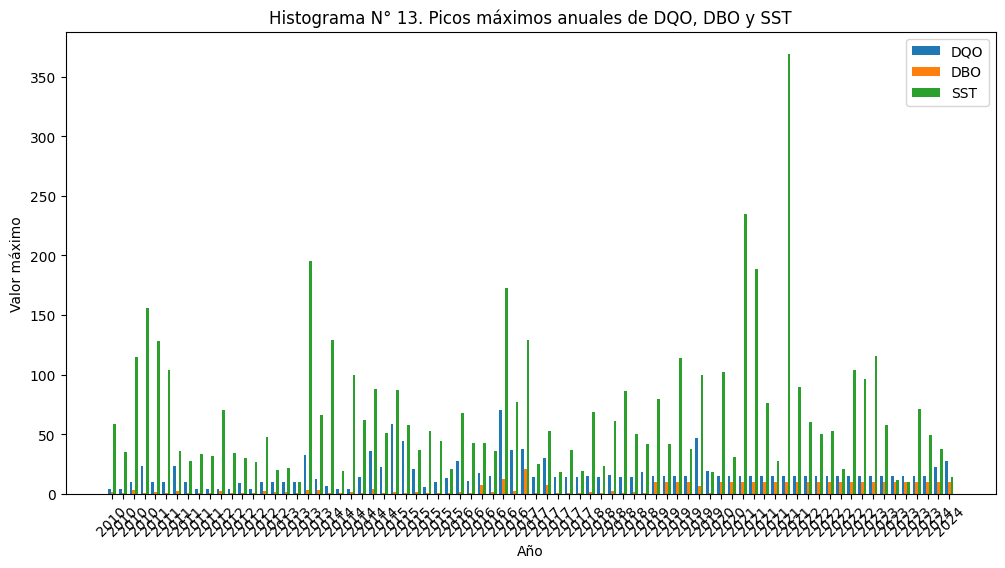

In [29]:
x = np.arange(len(df['Ano']))  # posiciones de los años
width = 0.25  # ancho de las barras

plt.figure(figsize=(12,6))
plt.bar(x - width, df['DQO'], width, label='DQO')
plt.bar(x, df['DBO'], width, label='DBO')
plt.bar(x + width, df['SST'], width, label='SST')

plt.xticks(x, df['Ano'], rotation=45)
plt.title('Histograma N° 13. Picos máximos anuales de DQO, DBO y SST')
plt.xlabel('Año')
plt.ylabel('Valor máximo')
plt.legend()
plt.show()

Teniendo en cuenta el gráfico anterior, no se observa que alguna de las variables muestre una tendencia a aumentar o disminuir en el tiempo. Los cambios son fluctuantes, lo cual sugiere que el análisis vendría mejor por épocas (seca, lluvias y transición) ya que, si bien se podría inferir que con el tiempo la contaminación aumenta o disminuye, en este caso resulta mejor analizar si hay relación entre las épocas y el aumento de algunas variables.

# **Análisis de picos por punto de monitoreo**

In [30]:
# Encontrar el valor máximo o los picos de DQO, DBO, and SST
max_dqo_row = df.loc[df['DQO'].idxmax()]
max_dbo_row = df.loc[df['DBO'].idxmax()]
max_sst_row = df.loc[df['SST'].idxmax()]

print("Punto de monitoreo y época con máximo DQO:")
display(max_dqo_row[['PUNTO DE MONITOREO_Original', 'Epoca', 'DQO']])

print("\nPunto de monitoreo y época con máximo DBO:")
display(max_dbo_row[['PUNTO DE MONITOREO_Original', 'Epoca', 'DBO']])

print("\nPunto de monitoreo y época con máximo SST:")
display(max_sst_row[['PUNTO DE MONITOREO_Original', 'Epoca', 'SST']])

Punto de monitoreo y época con máximo DQO:


,36
PUNTO DE MONITOREO_Original,Estacion Julumito
Epoca,Transicion
DQO,70.0



Punto de monitoreo y época con máximo DBO:


,38
PUNTO DE MONITOREO_Original,Estacion Julumito
Epoca,Lluvias
DBO,20.8



Punto de monitoreo y época con máximo SST:


,62
PUNTO DE MONITOREO_Original,Estacion Julumito
Epoca,Transicion
SST,369.0


De acuerdo con lo anterior, se tiene que el punto de monitoreo donde se presentan los valores máximos de los parámetros es la estación Julumito.

In [31]:
# Filtrar los valores de DBO, DQO y SST con los valores que sobrepasan el valor crítico o límite así: SST>70, DQO>38, DBO>10

#Filtro  de valores por encima de 70 mg/L de SST:

df_filtSST = df[(df['SST'] > 70)]
print('Tabla N° 4. Valores SST>70mg/L')
df_filtSST.head()

Tabla N° 4. Valores SST>70mg/L


,Ano,Epoca,CORRIENTE,PUNTO DE MONITOREO_Original,MUNICIPIO_AJUSTADO,DBO,DQO,SST
2,2010,Transicion,Rio Cauca,Estacion Julumito,Popayan,2.9,10.0,115.0
3,2010,Transicion,Rio Cauca,Puente vivero CRC,Popayan,0.5,23.0,156.0
4,2011,Lluvias,Rio Cauca,Estacion Julumito,Popayan,1.6,10.0,128.0
5,2011,Lluvias,Rio Cauca,Puente vivero CRC,Popayan,0.5,10.0,104.0
18,2013,Transicion,Rio Cauca,Estacion Julumito,Popayan,3.5,33.0,195.0


In [32]:
df_filtSST.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26 entries, 2 to 74
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Ano                          26 non-null     int64  
 1   Epoca                        26 non-null     object 
 2   CORRIENTE                    26 non-null     object 
 3   PUNTO DE MONITOREO_Original  26 non-null     object 
 4   MUNICIPIO_AJUSTADO           26 non-null     object 
 5   DBO                          26 non-null     float64
 6   DQO                          26 non-null     float64
 7   SST                          26 non-null     float64
dtypes: float64(3), int64(1), object(4)
memory usage: 1.8+ KB


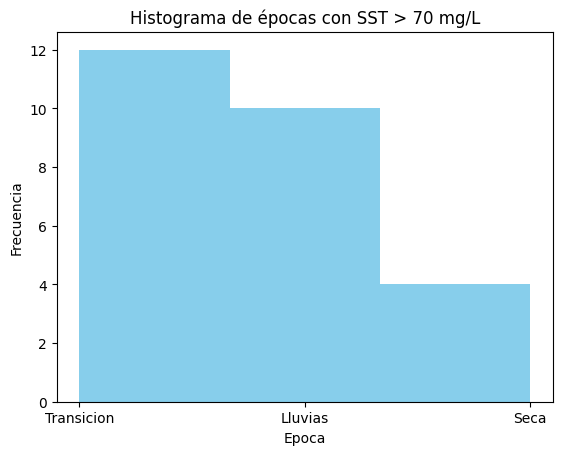

In [33]:
# Histograma SST>70 mg/L por época

plt.hist(df_filtSST['Epoca'], bins=3, color='skyblue')
plt.xlabel('Epoca')
plt.ylabel('Frecuencia')
plt.title('Histograma de épocas con SST > 70 mg/L')
plt.show()

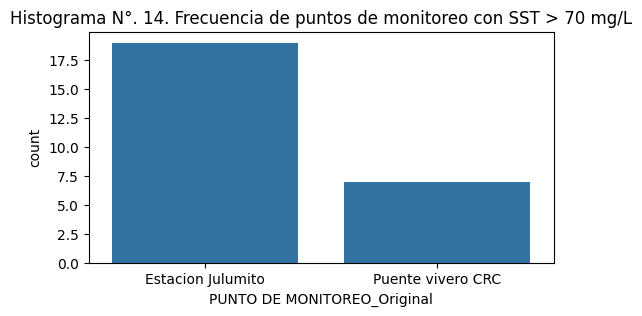

In [34]:
# Graficar histogramas de frecuencia de puntos de monitoreo del df_filtSST

plt.figure(figsize=(6, 3))
sns.countplot(data=df_filtSST, x='PUNTO DE MONITOREO_Original')
plt.xticks(rotation=0)
plt.title('Histograma N°. 14. Frecuencia de puntos de monitoreo con SST > 70 mg/L')
plt.show()

La mayoría de picos se presentan en la Estación Julumito.

In [35]:
# Filtrar los valores de DBO:

df_filtDBO = df[(df['DBO'] > 10)]
print('Tabla N° 5 Valores DBO>10mg/L')
display(df_filtDBO)


Tabla N° 5 Valores DBO>10mg/L


,Ano,Epoca,CORRIENTE,PUNTO DE MONITOREO_Original,MUNICIPIO_AJUSTADO,DBO,DQO,SST
36,2016,Transicion,Rio Cauca,Estacion Julumito,Popayan,12.9,70.0,173.0
38,2017,Lluvias,Rio Cauca,Estacion Julumito,Popayan,20.8,37.9,129.0


Los valores pico de DBO se presentan en la Estación Julumito.

In [36]:
# Filtrar los valores de DQO:

df_filtDQO = df[(df['DQO'] > 38)]
print('Tabla N°6. Valores DQO>38mg/L')
display(df_filtDQO)

Tabla N°6. Valores DQO>38mg/L


,Ano,Epoca,CORRIENTE,PUNTO DE MONITOREO_Original,MUNICIPIO_AJUSTADO,DBO,DQO,SST
26,2015,Lluvias,Rio Cauca,Estacion Julumito,Popayan,1.7,58.2,87.0
27,2015,Lluvias,Rio Cauca,Puente vivero CRC,Popayan,1.0,44.1,57.8
36,2016,Transicion,Rio Cauca,Estacion Julumito,Popayan,12.9,70.0,173.0
54,2019,Transicion,Rio Cauca,Estacion Julumito,Popayan,6.3,47.0,99.9


In [37]:
# Punto crítico en el que coinciden las tres variables
coinciding_peaks = df[(df['DBO'] > 10) & (df['DQO'] > 38) & (df['SST'] > 70)]
print("Tabla N°7. Puntos críticos en los que coinciden las tres variables DBO (>10), DQO (>38), and SST (>70):")
display(coinciding_peaks)

Tabla N°7. Puntos críticos en los que coinciden las tres variables DBO (>10), DQO (>38), and SST (>70):


,Ano,Epoca,CORRIENTE,PUNTO DE MONITOREO_Original,MUNICIPIO_AJUSTADO,DBO,DQO,SST
36,2016,Transicion,Rio Cauca,Estacion Julumito,Popayan,12.9,70.0,173.0


***Aplicación de ANOVA***

Se aplica ANOVA a fin de descartar o no, efectos aleatorios en cada una de las variables respecto al punto de monitoreo y a la época.

In [38]:
# Aplicar ANOVA en cada variable para obtener la relación entre las medias de las variables dentro del grupo de las épocas y los puntos de monitoreo.

from statsmodels.formula.api import ols

dependientes = ["DQO", "DBO", "SST"]
factores = ["Epoca", "PUNTO DE MONITOREO_Original"]

resultados = []

for var in dependientes:
    resultado_var = {"Variable": var}
    for fac in factores:
        # Fórmula ANOVA: cada variable dependiente con un factor
        formula = f'Q("{var}") ~ C(Q("{fac}"))'
        modelo = ols(formula, data=df).fit()
        anova = sm.stats.anova_lm(modelo, typ=2)

        # Extraer F y p
        fila = f'C(Q("{fac}"))'
        resultado_var[f"F_{fac}"] = anova.loc[fila, "F"]
        resultado_var[f"p_{fac}"] = anova.loc[fila, "PR(>F)"]

    resultados.append(resultado_var)

# Convertir a tabla resumen
tabla_anova = pd.DataFrame(resultados)
print("Tabla N°8. ANOVA")
display(tabla_anova)

Tabla N°8. ANOVA


,Variable,F_Epoca,p_Epoca,F_PUNTO DE MONITOREO_Original,p_PUNTO DE MONITOREO_Original
0,DQO,2.054962,0.135250,2.878642,0.093854
1,DBO,1.195027,0.308393,2.895659,0.092906
2,SST,3.719201,0.028836,10.577003,0.001709


De acuerdo con los resultados obtenidos, la única variable con un valor de p < 0.05, son los SST, lo cual quiere decir que la diferencia entre los grupos es significativa y por ende, los valores de este parámetro cambian de acuerdo con la época. Para saber específicamente entre cuáles existen las diferencias significativas, se hace una prueba post- hoc (Tukey HSD).

In [39]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Tukey HSD para SST según Epoca
tukey = pairwise_tukeyhsd(df["SST"], df["Epoca"])
print('Tabla N°9. Tukey HSD para SST según Epoca')
print(tukey)

Tabla N°9. Tukey HSD para SST según Epoca
   Multiple Comparison of Means - Tukey HSD, FWER=0.05    
 group1   group2   meandiff p-adj   lower    upper  reject
----------------------------------------------------------
Lluvias       Seca -32.8115 0.0902 -69.6082  3.9851  False
Lluvias Transicion   6.2596 0.9129 -30.5371 43.0563  False
   Seca Transicion  39.0712 0.0348   2.2745 75.8678   True
----------------------------------------------------------


Se observa que la diferencia significativa se da entre la época de transición y la época seca.

Por otro lado, no se encuentra que los valores de p para DQO y DBO tengan una diferencia significativa entre grupos, hecho que, ya se había corroborado anteriormente mediante las visualizaciones como el pairplot, diagramas de dispersión, matriz de correlación, histograma N°13 y otros, en las cuales no se observaban relaciones claras entre la concentración de DQO y la época, así mismo, se observó que la concentración de DBO tiende a no presentar valores atípicos de acuerdo con el box plot N°1.

***Añadir un pipeline para aplicar un modelo reproducible que cuantifique la variabilidad de los SST según la época y el punto de monitoreo..***

Teniendo en cuenta lo anterior, se sugiere aprovechar la relación encontrada entre SST con la ápoca y el punto de monitoreo para aplicar un modelo reproducible que cuantifique la variabilidad de los SST según la época y el punto de monitoreo para de etse modo, aplicar el concepto de pipeline.

In [43]:
# Importar librerías necesarias

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression

# Partición de los datos
X = df[['Epoca', 'PUNTO DE MONITOREO_Original']]   # predictora categórica
y = df['SST']        # variable respuesta

# Dividir en train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocesamiento: one-hot encoding para época
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first'), ['Epoca'])
    ]
)

# Pipeline completo
pipe = Pipeline(steps=[
    ('preprocess', preprocessor),
    ('model', LinearRegression())
])

# Entrenar
pipe.fit(X_train, y_train)

# Evaluar
r2 = pipe.score(X_test, y_test)
print(f"R² en test: {r2:.3f}")


R² en test: 0.122


El anterior resultado indica que el punto de monitoreo y la época no son los únicos predictores que deben tenerse en cuenta para la concentración de SST, sin embargo, las diferencias de valores que existen entre épocas si son significativas, lo que indica que en épocas de transición si se tendría un aumento en la concentración de SST en el agua.


# **Conclusiones:**

De acuerdo con los resultados obtenidos se puede concluir que las variables no guardan una relación lineal, inclusive, a través de regresión polinomial no se posible describir una relación definida entre alguna de ellas.

Ateniendo al propósito inicial que corresponde a identificar los períodos o épocas y puntos de monitoreo en un periodo de 14 años (desde el 2010 hasta el 2024) en los cuales se presentaron los mayores picos de contaminación o valores críticos de los parámteros DBO, DQO y SST, para poder priorizar las intervenciones de la fuente, se logró determinar que:

*   El punto de monitoreo con los mayores picos de contaminación fue la Estación Julumito lo cual guarda mucha relación con que este punto se encuentre ubicado después del punto vivero CRC y tenga un recorrido mas amplio durante el cual recibe contaminación de diversas fuentes de la parte urbana, vertimientos puntuales no controlados.
*   La época con mayor valores críticos para SST y DQO fue la época de transición, sin embargo, para la DBO no fue posible determinarla ya que tanto la época de lluvia como de transición, tienen igual cantidad de valores pico. Esto guarda mucho sentido teniendo en cuenta que en la época de transición hay disminución de la renovación y el lavado de los cuerpos de agua por disminución de lluvias, el aumento de la concentración de contaminantes por pérdida de caudal, y la posible aparición de materiales tóxicos suspendidos en el agua por la erosión del suelo debida posiblemente a vientos que arrastran sedimentos hacia el agua.
*   Existe una diferencia significativa entre los valores de SST en época seca y en época de transición, lo cual sugiere que los valores atípicos, por encima de 70 mg/L generalmente, se encontrarán en la época de transición.
*   La época seca no contiene valores pico de ninguna variable.
*   Los tres parámetros coinciden solo una vez en el resgitro con picos de contaminación lo que sugiere nuevamente la ausencia de relación entre variables. Este registro de 2016 coincide con la época y el punto de monitoreo donde se reporta la mayor ocurrencia de valores pico, es decir, época de transición en la Estación Julumito.
*   La variable con mayor número de valores pico fue SST, con 26 registros de un total de 78, es decir el 33%. Mientras tanto, la DQO solo tuvo 4 y la DBO, 2, indicando concentraciones mas estables a lo largo del tiempo y del recorrido.
*   Al contrario de lo que se podría pensar, no existe una tendencia temporal signifcativa de aumento en las concentraciones de SST, DBO y DQO. La cantidad de concentración de dichos parámetros, pese a que han tenido picos elevados algunos años, DQO y SST, por ejemplo, vuelven a bajar.  
*   La DBO es el parámetro mas estable, sin gran cantidad de valores atípicos en el tiempo.

Así las cosas, el análisis sugiere que la calidad del agua no es homogénea y que esta tiene un impacto mayor en el tramo después del puente Vivero CRC y antes de la Estación Julumito lo cual permite direccionar la priorización de intervenciones de control de vertimientos en la zona urbana entre el punto de monitoreo Vivero CRC y Estación Julumito.

En esta fuente hídrica predomina la contaminación difícil de tratar biológicamente ya que los valores de DQO superan los de DBO. La DQO presenta valores pico en varias épocas del año. Aun así, en el tramo monitoreado no se evidencia que los valores de DQO y DBO estén por fuera de los límites normativos permisibles, sugiriendo una alta capacidad de depuración de la fuente. Sin embargo, la presencia de una gran cantidad de partículas que no están disueltas en el agua, es decir, de SST, reduce su calidad general y puede causar problemas de obstrucción en los sistemas de tratamiento. Para tratar esta agua se requieren métodos de tratamiento avanzados puesto que todo el análisis arroja resultados que denotan la presencia de sustancias tóxicas, o contaminantes difíciles de biodegradar. Esto además, tiene un impacto negativo en la vida acuática porque la turbidez impide el paso de luz y afecta el crecimiento de la vegetación, también implica mayor inversión para los sitemas de tratamiento.

La pregunta Smart permitió encontrar el relacionamiento de variables entre sí, como por ejemplo, la incidencia de las época del año con la concentración de SST, sin embargo, con tan pocas variables y sin estar correlacionadas entre sí no es posible hallar tendencias de aumento o dismunicón de la concetración de contaminación en la fuente. Dentro del período analizado, por ejemplo, se podría intuir que la contaminación tiende a mantenerse estable la mayor parte .
del año y que, a través del tiempo, la contaminación no aumenta significativamente, sin embargo, se requiere de muchos mas parámetros para llegar a esa conclusión.

# **Recomendaciones**

Incluir variables como temperatura, caudal y en general. el mayor número de variables posible para llegar a una conclusión que permita establecer si ha existido alguna tendencia en el aumento o disminución de la contaminación a través de los años.

Implementar medidas estrictas para el control de descargas urbanas e industriales, especialmente durante la época de transición, para mitigar los picos de SST y DQO, priorizando las intervenciones después del puente vivero CRC.

Promover la restauración y reforestación de zonas ribereñas para reducir la erosión y el arrastre de SST en época de transición, actuando como filtros naturales.

Continuar el monitoreo con mayor frecuencia y ampliar los puntos de monitoreo en el municipio para determinar qué actividades específicas podrían estar asociadas a los picos de las variables haviendo un reconocimiento de actividades con influencia directa e indirecta en el río.